In [31]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# %matplotlib inline
# from tqdm.notebook import tqdm
# import warnings
# warnings.filterwarnings("ignore")

In [32]:
boston = tf.keras.datasets.boston_housing

In [33]:
dir(boston)

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'load_data']

In [34]:
boston_data = boston.load_data()

In [35]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.boston_housing.load_data(path='boston_housing.npz', test_split=0.2, seed=42)
     

In [36]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((404, 13), (404,), (102, 13), (102,))

In [37]:
scaler = StandardScaler()
     

In [38]:
y_train.shape

(404,)

In [39]:
# x_train_scaled = scaler.fit_transform(x_train)
# x_test_scaled = scaler.transform(x_test)

# y_train_scaled = scaler.fit_transform(y_train.reshape(-1, 1))
# y_test_scaled = scaler.transform(y_test.reshape(-1, 1))

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

y_train =(y_train.reshape(-1, 1))
y_test =(y_test.reshape(-1, 1))

In [40]:
y_train.shape

(404, 1)

In [9]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(13,), name='input-layer'),
    tf.keras.layers.Dense(100, name='hidden-layer-2'),
    tf.keras.layers.BatchNormalization(name='hidden-layer-3'),
    tf.keras.layers.Dense(50, name='hidden-layer-4'),
    tf.keras.layers.Dense(1, name='output-layer')
])

In [10]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ hidden-layer-2 (Dense)               │ (None, 100)                 │           1,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ hidden-layer-3 (BatchNormalization)  │ (None, 100)                 │             400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ hidden-layer-4 (Dense)               │ (None, 50)                  │           5,050 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output-layer (Dense)                 │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,901 (26.96 KB)

 Trainable params: 6,701 (26.18 KB)

 Non-trainable params: 200 (800.00 B)

In [11]:
model.compile(
    optimizer='adam',
    loss='mse',
    metrics=['mae']
)
     

In [12]:
history = model.fit(x_train, y_train, batch_size=32, epochs=50, validation_data=(x_test, y_test))

Epoch 1/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 556.7018 - mae: 22.1597 - val_loss: 532.4188 - val_mae: 22.0762
Epoch 2/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 549.3071 - mae: 22.5561 - val_loss: 503.2310 - val_mae: 21.6376
Epoch 3/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 491.2855 - mae: 21.4611 - val_loss: 477.1113 - val_mae: 21.1291
Epoch 4/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 465.7743 - mae: 20.9454 - val_loss: 440.7126 - val_mae: 20.3296
Epoch 5/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 433.5042 - mae: 20.2218 - val_loss: 396.8439 - val_mae: 19.2367
Epoch 6/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 381.6576 - mae: 18.9669 - val_loss: 331.3546 - val_mae: 17.4628
Epoch 7/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 328.6602 - mae: 17.4369 - val_loss: 249.0334 - val_mae: 14.8643
Epoch 8/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 201.6912 - mae: 13.3227 - val_loss: 153.1601 - val_mae: 11.2207
Epoch 9/50
13/13

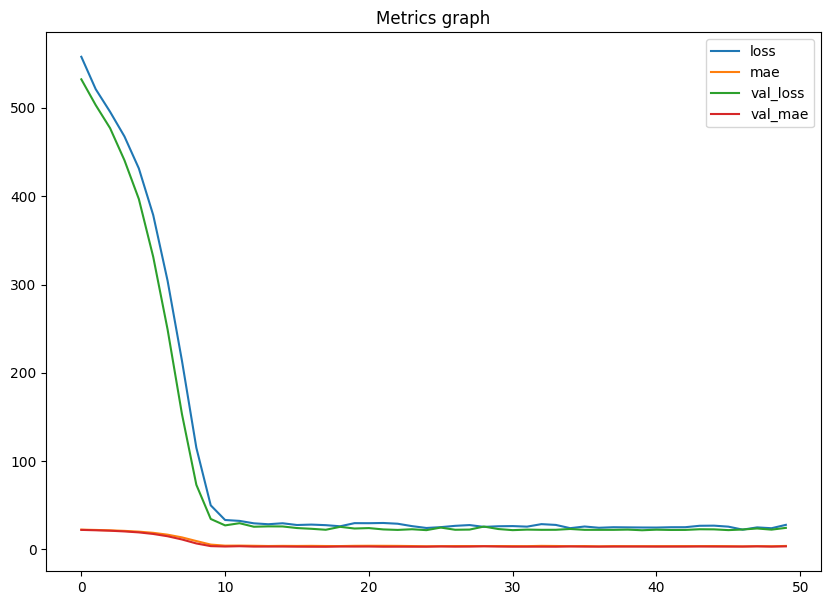

In [13]:
pd.DataFrame(history.history).plot(figsize=(10,7))
plt.title("Metrics graph")
plt.show()

In [14]:
y_pred = model.predict(x_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


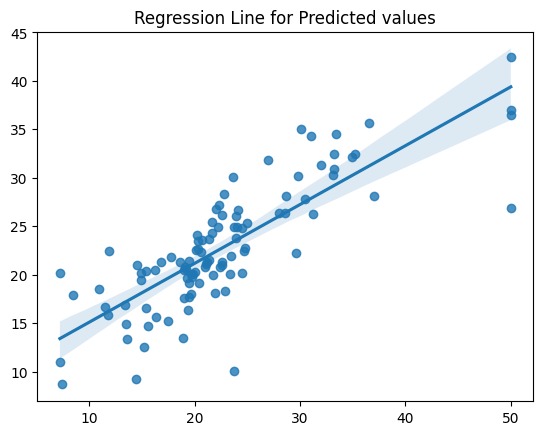

In [15]:
sns.regplot(x=y_test, y=y_pred)
plt.title("Regression Line for Predicted values")
plt.show()

In [16]:
def regression_metrics_display(y_test, y_pred):
  print(f"MAE is {metrics.mean_absolute_error(y_test, y_pred)}")
  print(f"MSE is {metrics.mean_squared_error(y_test,y_pred)}")
  print(f"R2 score is {metrics.r2_score(y_test, y_pred)}")
     

In [18]:
regression_metrics_display(y_test, y_pred)

MAE is 3.412961365194882
MSE is 24.36412415729169
R2 score is 0.6578169132220423


In [25]:
y_test[17]

array([19.5])

In [26]:
y_pred[17]

array([19.107374], dtype=float32)